In [1]:
!nvidia-smi

Thu Mar 21 02:09:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


# Install YOLOv8

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5519.7/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# Download dataset from Roboflow

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JSVeJAx7mmzoT48naM0W")
project = rf.workspace("idcardocr-cnbea").project("4corners-gwkuc")
version = project.version(6)
dataset = version.download("yolov8")

/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installatio


Extracting Dataset Version Zip to 4corners-6 in yolov8:: 100%|██████████| 1180/1180 [00:00<00:00, 7137.92it/s]


# Custom training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 273MB/s]
New https://pypi.org/project/ultralytics/8.1.30 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/4corners-6/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False

In [7]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  results.png
PR_curve.png					  train_batch0.jpg
P_curve.png					  train_batch1.jpg
R_curve.png					  train_batch2.jpg
args.yaml					  train_batch2880.jpg
confusion_matrix.png				  train_batch2881.jpg
confusion_matrix_normalized.png			  train_batch2882.jpg
events.out.tfevents.1710987055.274edee41c34.72.0  val_batch0_labels.jpg
labels.jpg					  val_batch0_pred.jpg
labels_correlogram.jpg				  weights
results.csv


/kaggle/working


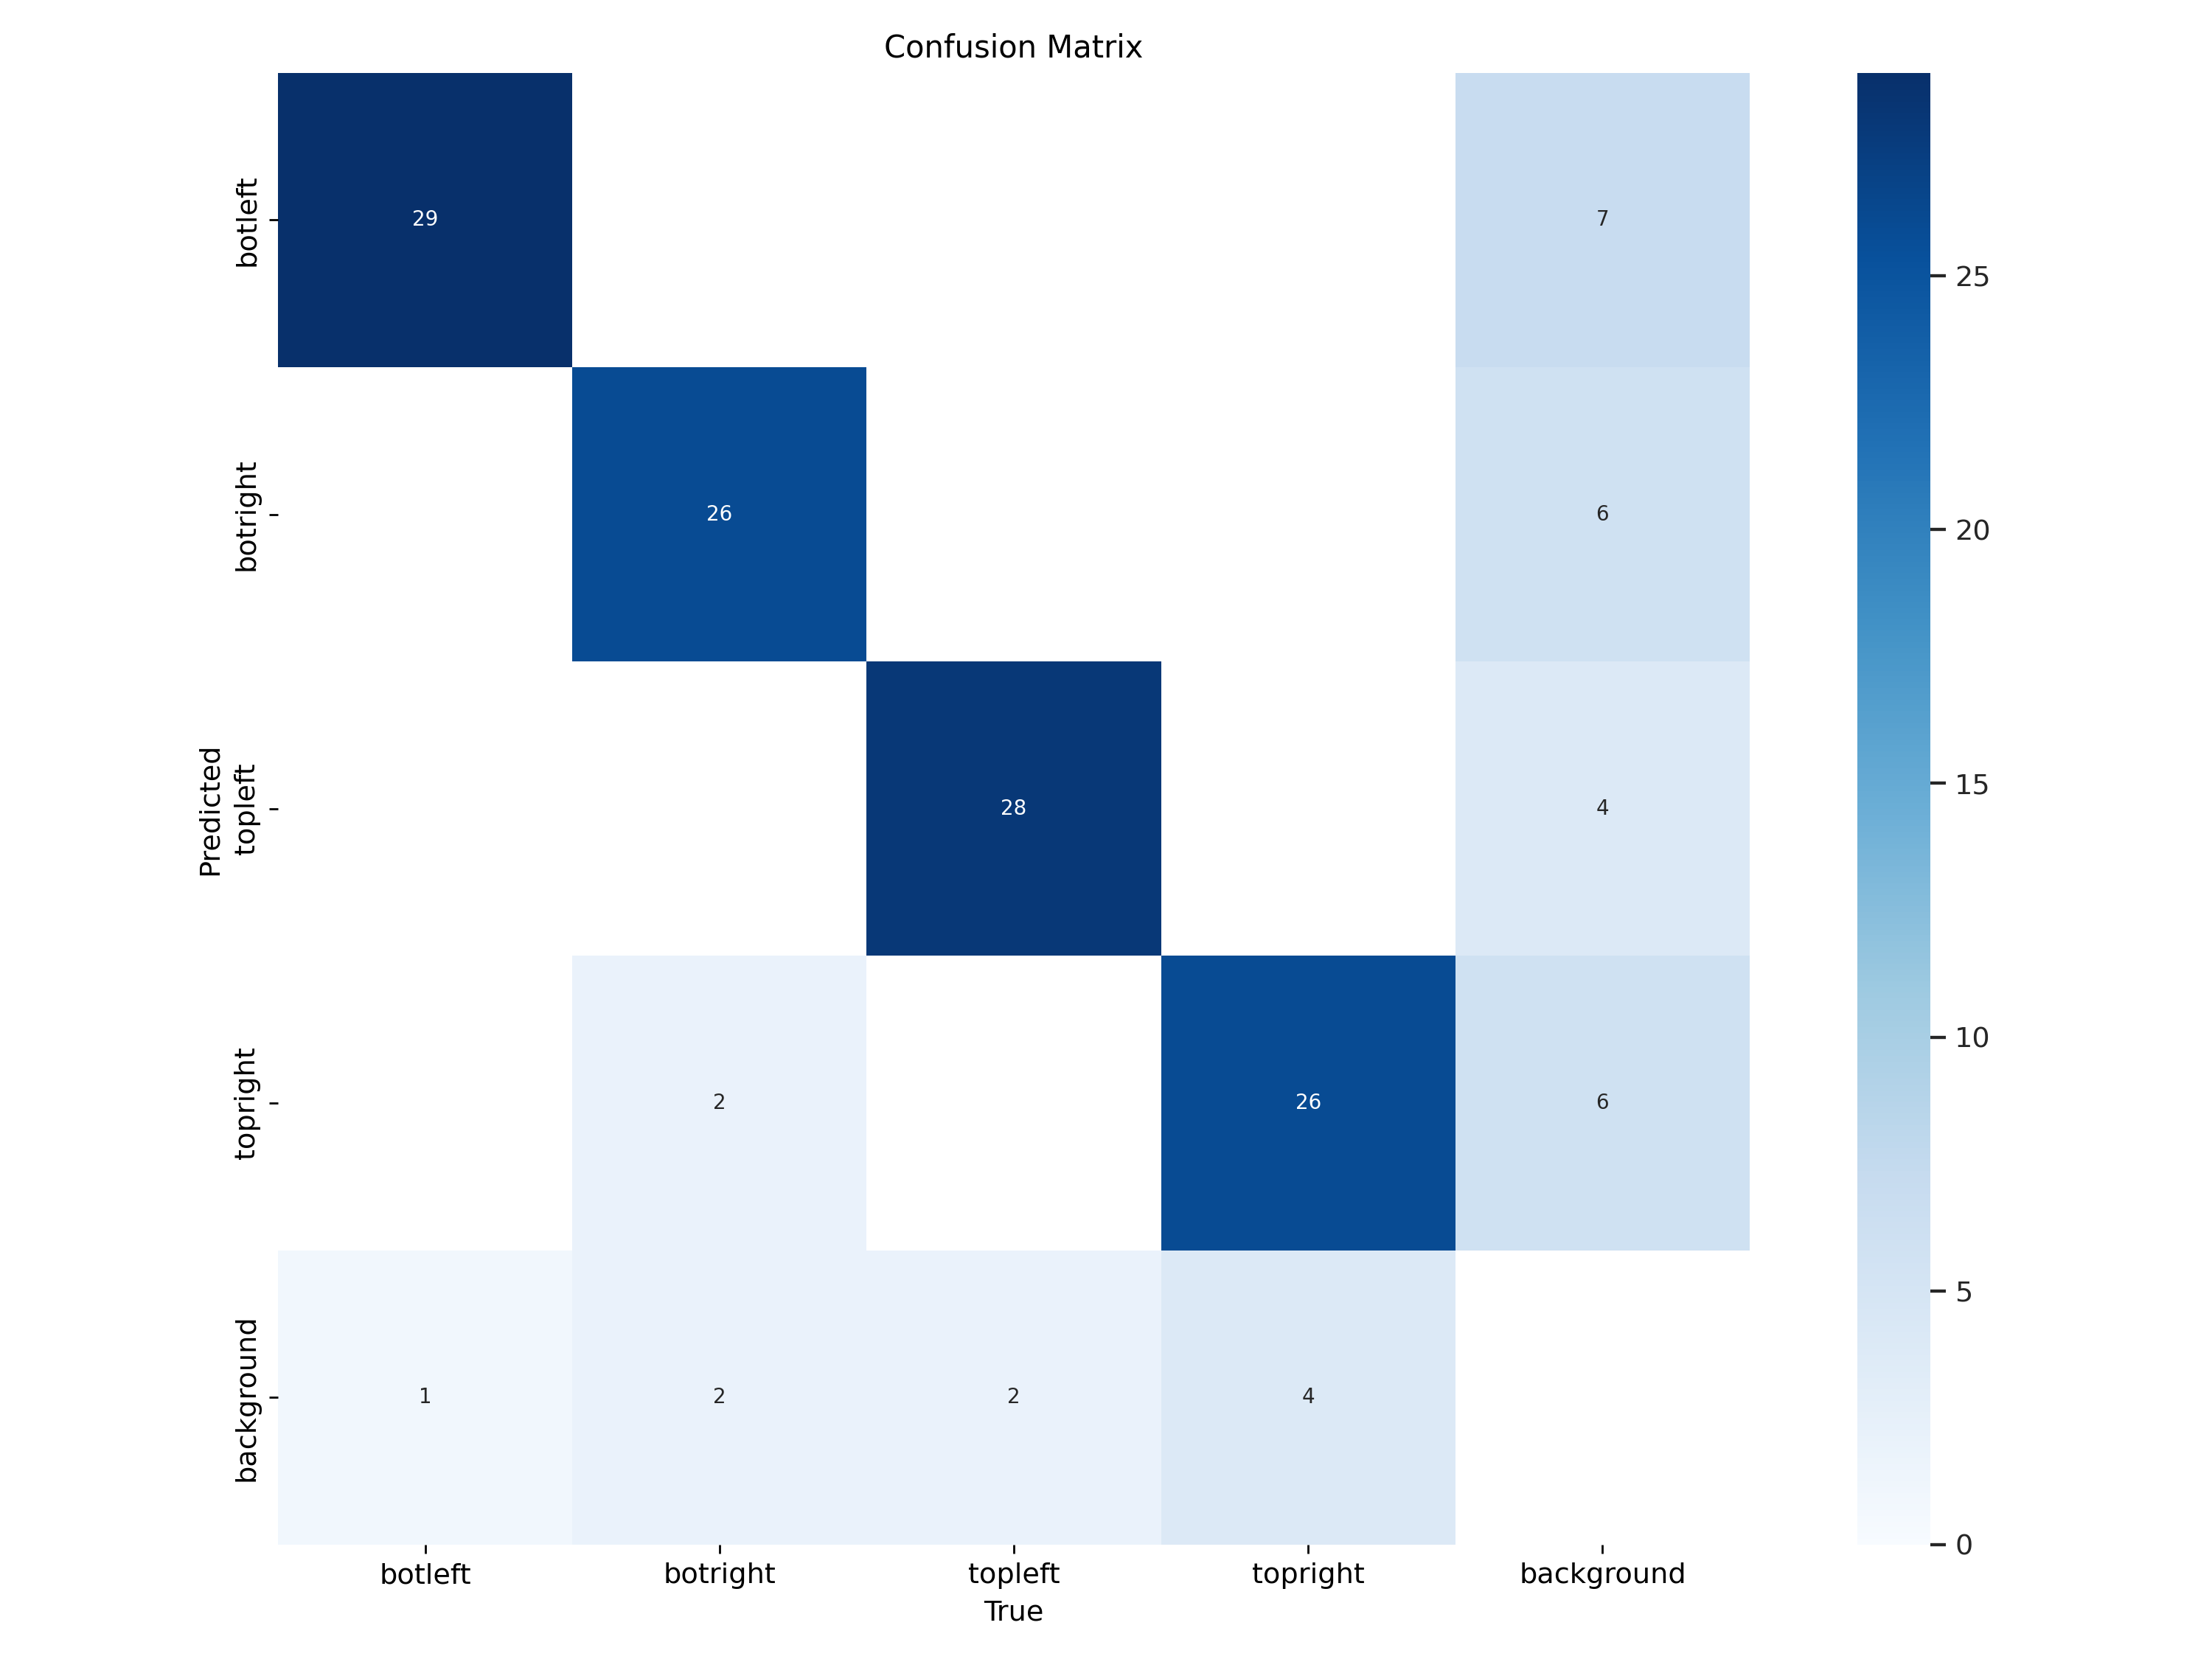

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


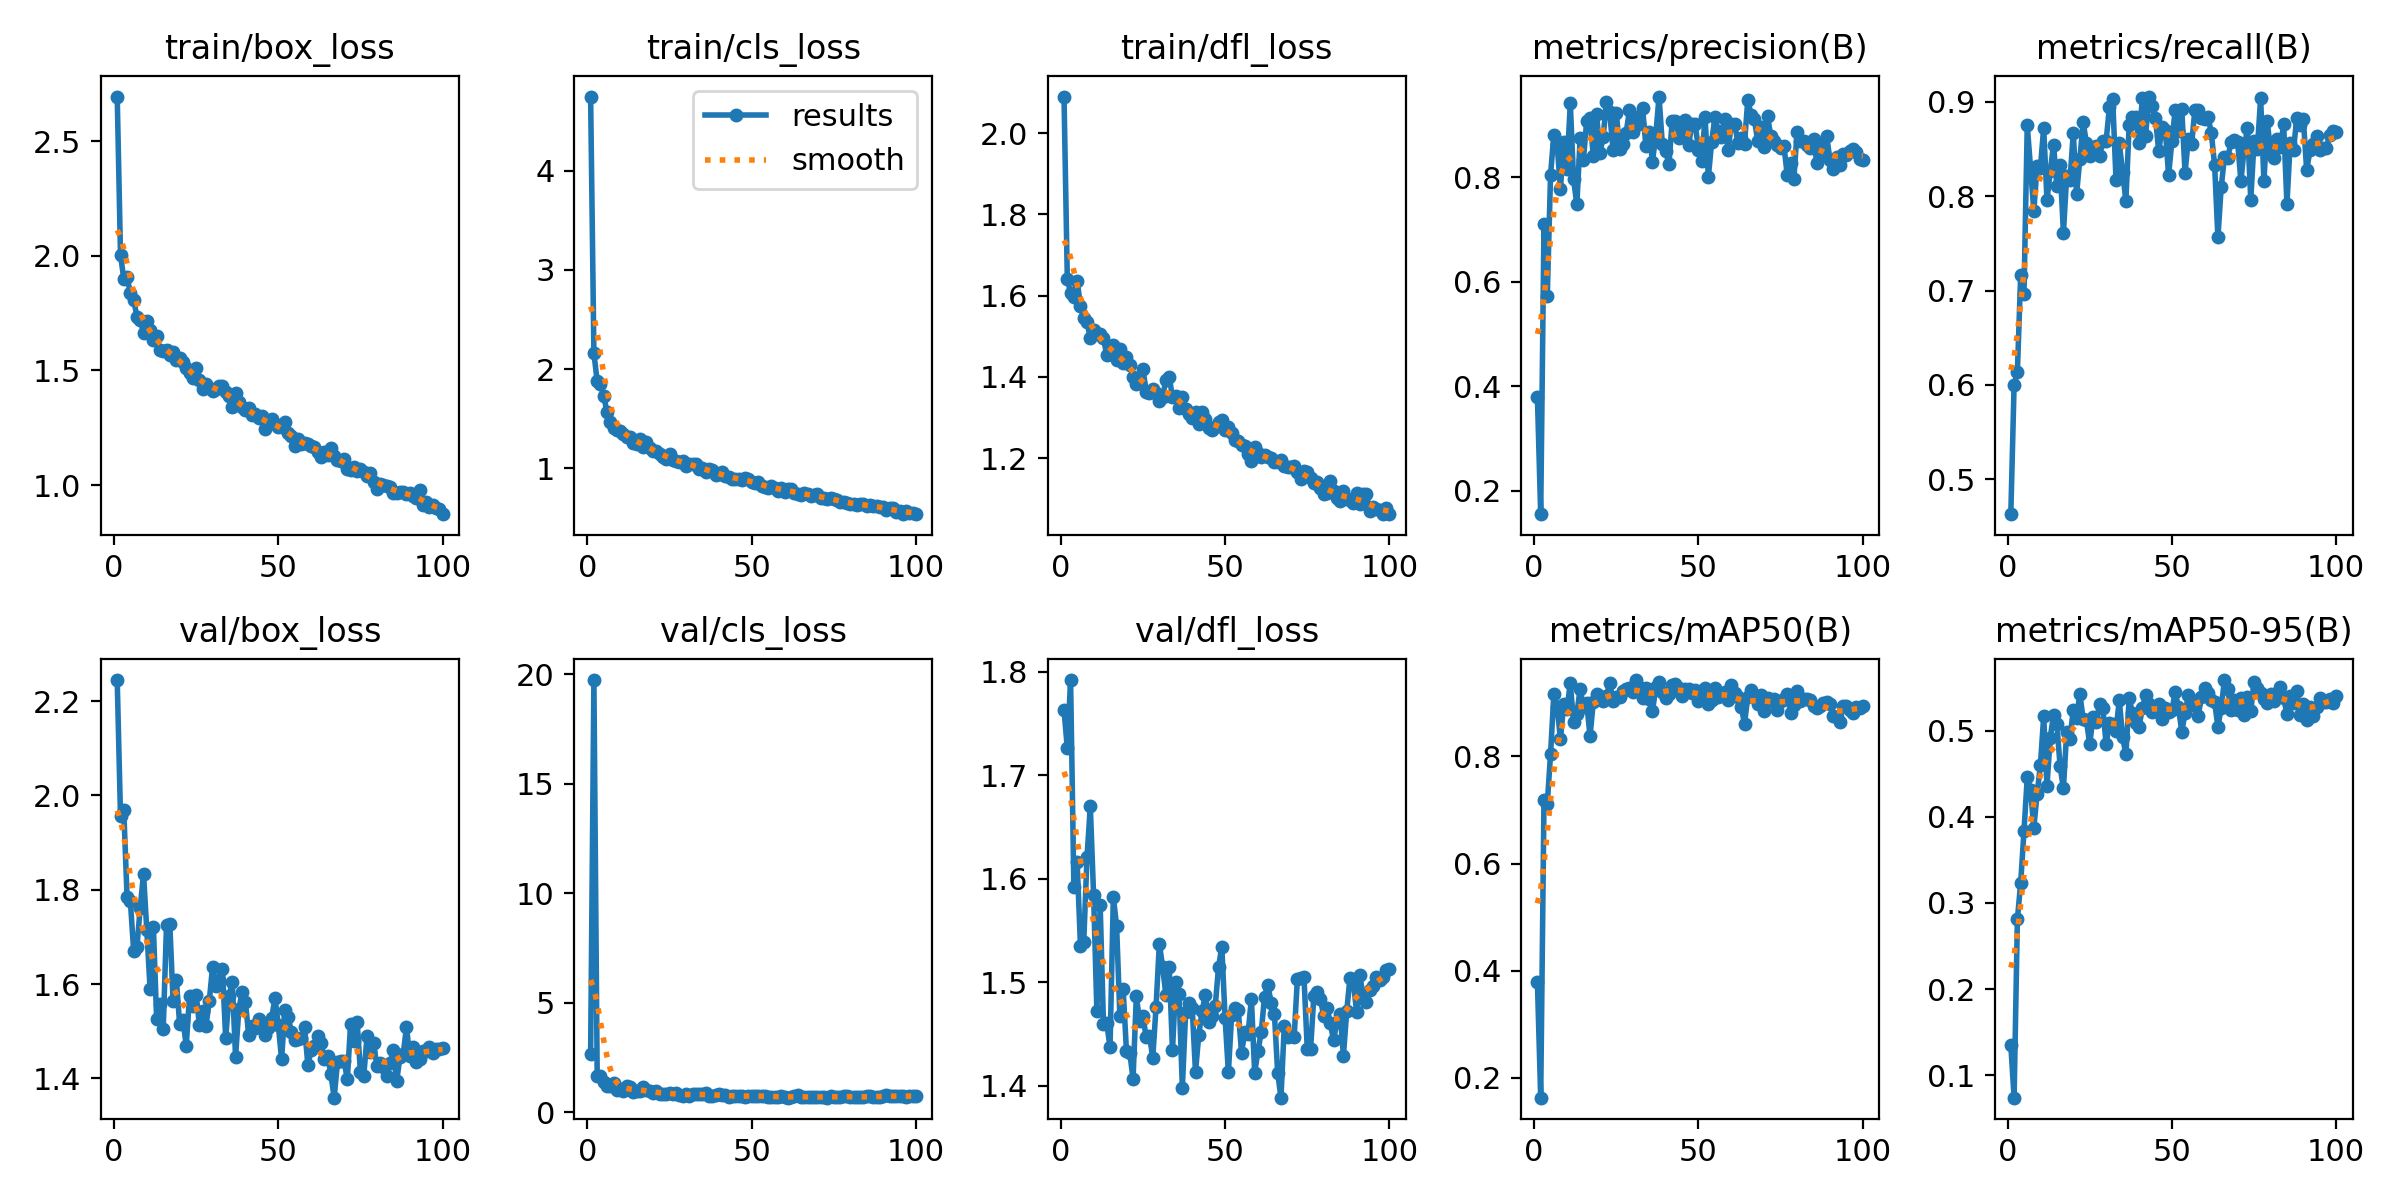

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


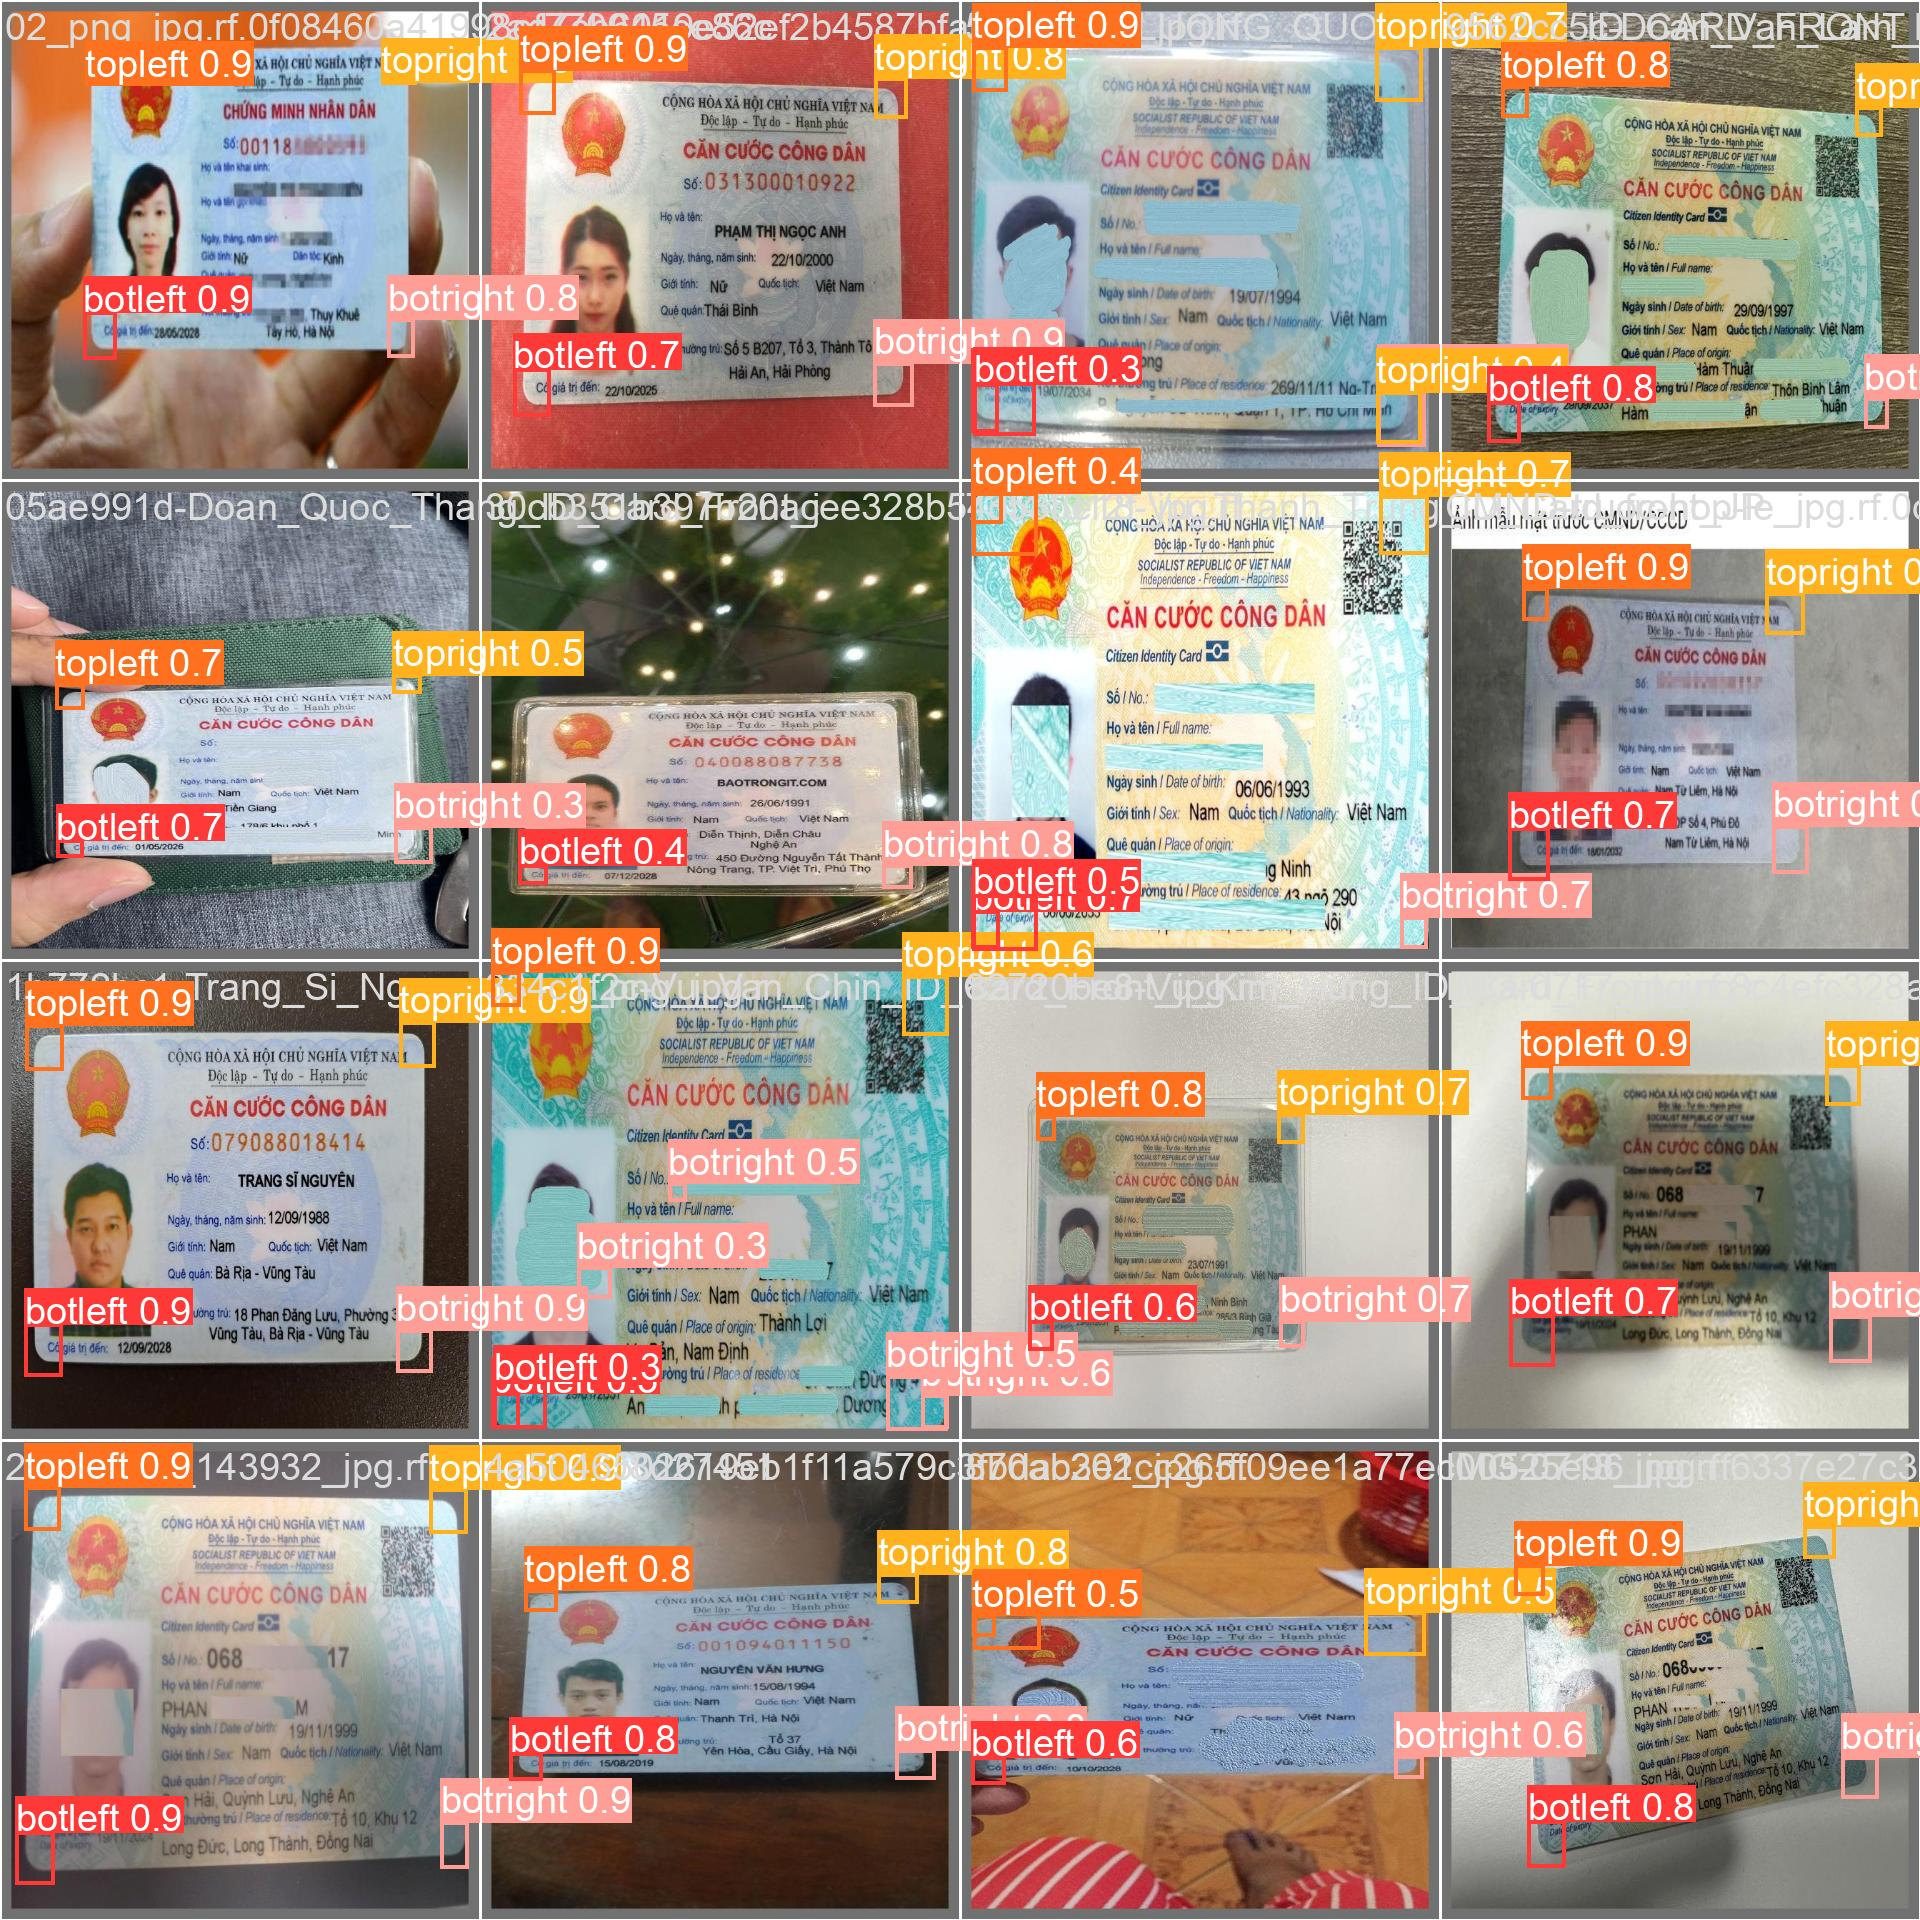

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/4corners-6/valid/labels.cache... 30 image
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         30        120       0.92      0.842      0.923      0.558
               botleft         30         30      0.913        0.8      0.915      0.567
              botright         30         30      0.929      0.867      0.913      0.534
               topleft         30         30      0.902        0.9      0.951      0.648
              topright         30         30      0.937        0.8      0.914      0.485
Speed: 3.2ms preprocess, 42.6ms inference, 0.0ms loss, 11.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/52 /kaggle/working/datasets/4corners-6/test/images/00_png_jpg.rf.2c6b81f64d911801e883927af97e8d44.jpg: 640x640 1 botleft, 1 botright, 1 topleft, 1 topright, 10.6ms
image 2/52 /kaggle/working/datasets/4corners-6/test/images/00_png_jpg.rf.88276f39ecd61d33f09e8ad7ca2d23d5.jpg: 640x640 1 botleft, 1 botright, 1 topleft, 1 topright, 7.7ms
image 3/52 /kaggle/working/datasets/4corners-6/test/images/01_png_jpg.rf.ea80b58d61235043c9170101c654072d.jpg: 640x640 1 botleft, 1 botright, 1 topleft, 1 topright, 7.5ms
image 4/52 /kaggle/working/datasets/4corners-6/test/images/01_png_jpg.rf.fa4574b95b8d09dbb4921bec9146eff1.jpg: 640x640 1 botleft, 1 botright, 1 topleft, 1 topright, 7.5ms
image 5/52 /kaggle/working/datasets/4corners-6/test/images/20221208_143932_jpg.rf.ac72271bddd9dd570f8ab34943e43a2b.jpg: 640

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [14]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/idcardocr-cnbea/4corners-gwkuc/6
Share your model with the world at: https://universe.roboflow.com/idcardocr-cnbea/4corners-gwkuc/model/6
